# Build Model Top Array

This notebook is used to imprint ESRI raster data onto the specified model grid.

The output is an ascii grid which consist of the mean DEM value for each model cell, readable by numpy.

In [1]:
%matplotlib inline
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from arcutils import import_surface

In [2]:
# import model dimensions
import sys
sys.path.append(r'..\2_build_model_with_flopy')
from model import nrow, ncol

## Compute Mean DEM Value for Each Grid Cell

In [3]:
# run the "import_surface()" function stored in the
# script arcutils.py. This returns a numpy array
# that can be plotted and saved to disk for future
# use.

loadpth = r'..\..\data\ndm_model'

# define the input ESRI raster
dem = os.path.join(loadpth, 'dem_3dep_ft')

# define the name of the grid shapefile
grid_shp= os.path.join(loadpth, 'ndm_grid.shp')

a = import_surface(dem,
                   grid_shp,
                   nrow,
                   ncol,
                   statistic='MEAN', 
                   cellsize=100.)

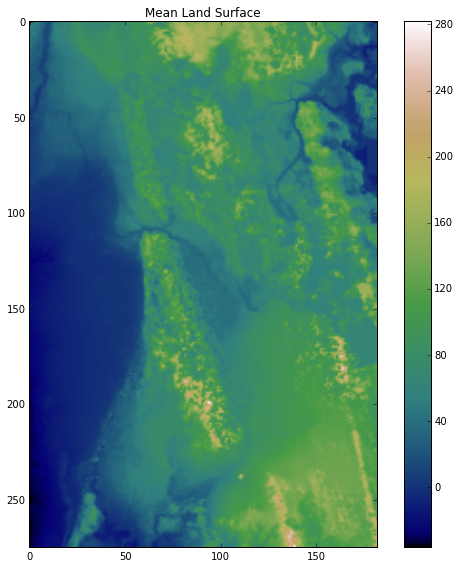

In [4]:
# plot the numpy array

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

ax.set_title('Mean Land Surface')

im = ax.imshow(a, cmap='gist_earth')
cb = plt.colorbar(im)

plt.tight_layout()
plt.show()

In [5]:
a.shape

(275L, 182L)

In [6]:
# save the numpy array to disk so we can load it later
np.savetxt('dem_3dep_ft_mean.ref', a, fmt='%15.6E', delimiter='')